#### The primary goal of this analysis is to determine hotspots of 911 calls for  violent crimes.
I will first load three dataframes(calls_for_service,call_for_violent_crimes, calls_for_property_crimes) from data wrangling notebook. In this notebook, I will try to get more insight of crime data by plotting data on graphs and creating crime hotspots on map.

The statistical significance of these observations will be tested in the next section Exploratory Data Analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [2]:
# Call the dataframes saved on datawrangling notebook
%store -r calls_for_service
%store -r calls_for_violent_crimes
%store -r calls_for_property_crimes
#calls_for_violent_crimes.count()

In [7]:
calls_for_violent_crimes.head()

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,Year
10,200 Block Of Taylor St,Premise Address,2016-09-20 17:48:00,San Francisco,162643133,REP,2016-09-20T00:00:00.000,Robbery,2016-09-20T00:00:00.000,CA,2016
177,Market St/van Ness Av,Intersection,2016-09-21 01:10:00,San Francisco,162650152,REP,2016-09-21T00:00:00.000,Sexual Assault Adult,2016-09-21T00:00:00.000,CA,2016
247,700 Blk Ofarrell St,Geo-Override,2016-09-21 02:45:00,San Francisco,162650278,REP,2016-09-21T00:00:00.000,Robbery,2016-09-21T00:00:00.000,CA,2016
306,400 Block Of Gough St,Premise Address,2016-09-21 04:06:00,San Francisco,162650376,REP,2016-09-21T00:00:00.000,Strongarm Robbery,2016-09-21T00:00:00.000,CA,2016
410,500 Block Of Stanyan St,Common Location,2016-09-21 06:20:00,San Francisco,162650547,REP,2016-09-21T00:00:00.000,Sexual Assault Adult,2016-09-21T00:00:00.000,CA,2016


### For which city, more calls were reported for violent crimes?

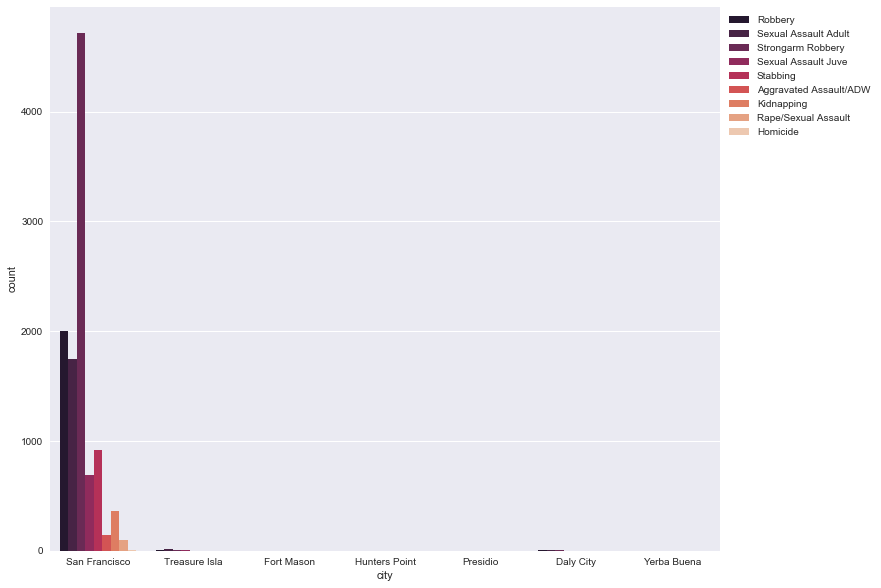

In [4]:
#calls_for_violent_crimes['Reason']=calls_for_violent_crimes['original_crimetype_name'].apply(lambda s:s.split(':')[0])
sns.set(style='darkgrid')
width=12
height=10
figure(figsize=(width,height))
sns.countplot(x='city', hue='original_crimetype_name', data=calls_for_violent_crimes,palette="rocket")
plt.legend(bbox_to_anchor=(1,1))

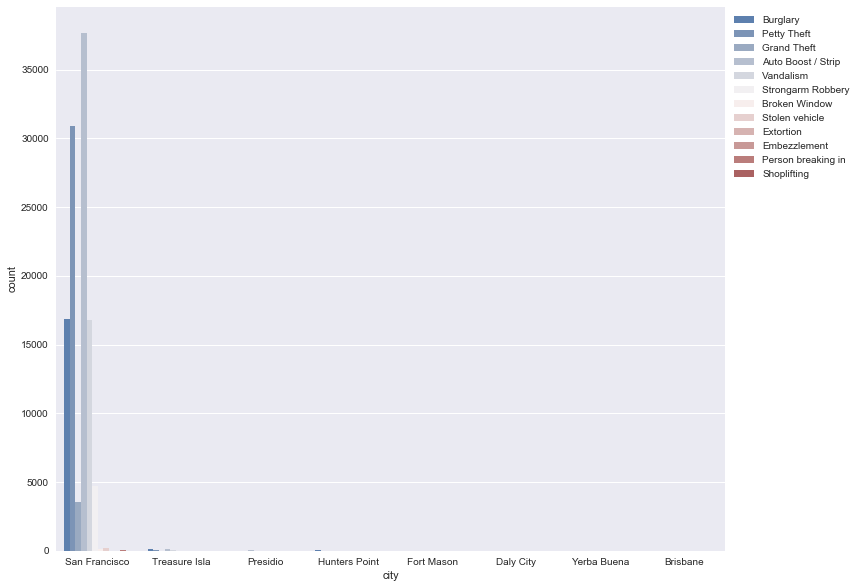

In [5]:
sns.set(style='darkgrid')
width=12
height=10
figure(figsize=(width,height))
sns.countplot(x='city', hue='original_crimetype_name', data=calls_for_property_crimes, palette="vlag")
plt.legend(bbox_to_anchor=(1,1))

Occurences of robberies far outnumbered the other crimes.

Most of the calls are received from San francisco city.Cities listed above are small compared to San francisco city so in my opinion,demographic of the city played an inportant part in the number of calls above.

## How number of calls  has changed over the years? is it decreasing?

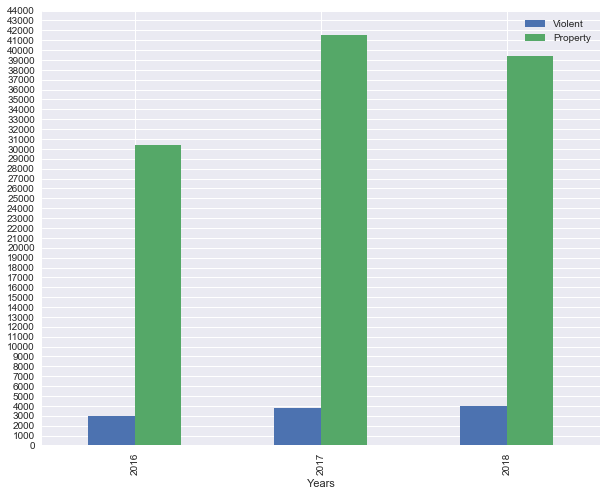

In [6]:
calls_for_property_crimes['Year'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%Y'))
calls_for_violent_crimes['Year'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%Y'))
yearly_violentCrime = pd.DataFrame(calls_for_violent_crimes["Year"].value_counts(sort=True))
yearly_propertyCrime= pd.DataFrame(calls_for_property_crimes["Year"].value_counts())
yearly_crimes = pd.merge(yearly_violentCrime,yearly_propertyCrime,left_index=True,right_index=True)
#yearly_crimes = pd.merge(yearly_violentCrime,yearly_propertyCrime)
yearly_crimes.index.name = 'Years'
yearly_crimes.columns = ['Violent','Property']
yearly_crimes.sort_index(inplace=True)
yearly_crimes.reset_index().plot(x='Years', y=['Violent','Property'],kind='Bar',figsize=(10,8),yticks = range(0,45000,1000))

####  Let's now see the number of calls made each year for Violent crimes

In [8]:
violent_crimes_count_year = calls_for_violent_crimes.pivot_table('crime_id', aggfunc=np.size, columns='original_crimetype_name', index=calls_for_violent_crimes.Year, fill_value=0)
violent_crimes_count_year.index.sort_values(ascending=True)
#crimes_count_date= pd.DatetimeIndex(crimes_count_date.index)
#plo = crimes_count_date.plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
violent_crimes_count_year
#yearly_crimes.reset_index().plot(x='Years', y=['Violent','Property'],kind='Bar',figsize=(10,8),yticks = range(0,45000,1000))

original_crimetype_name,Aggravated Assault/ADW,Homicide,Kidnapping,Rape/Sexual Assault,Robbery,Sexual Assault Adult,Sexual Assault Juve,Stabbing,Strongarm Robbery
Year,,,,,,,,,
2016,48,2,88,30,606,424,179,240,1329
2017,52,3,143,29,692,662,231,347,1669
2018,48,2,135,42,713,678,286,333,1739


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA84D40C88>,
      dtype=object)

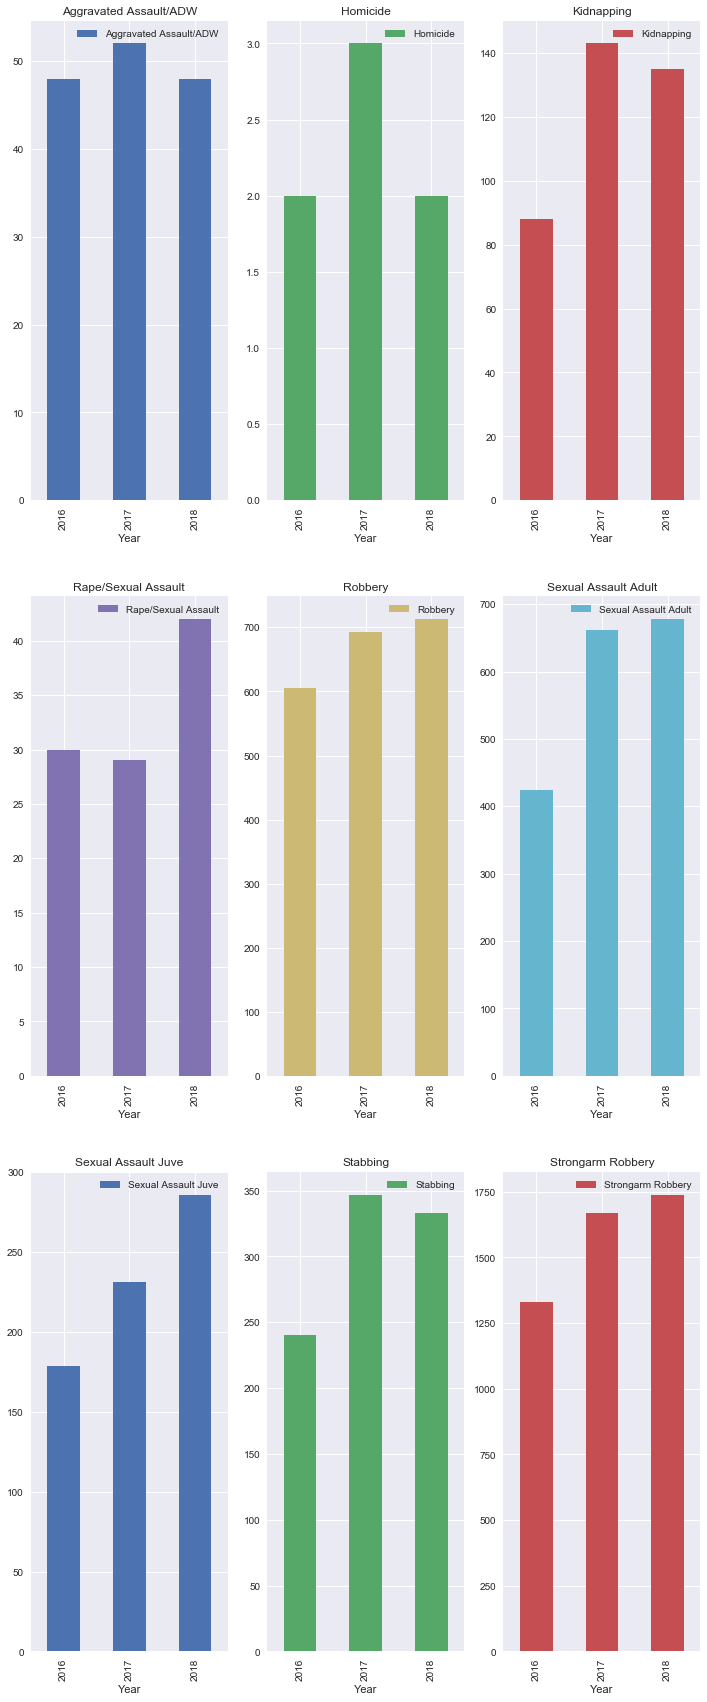

In [9]:
violent_crimes_count_year.plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

As dataset covers the period 03/31/2016-present. Data for 2016 is not complete.We can stillcompare 2017's and 2018's data. An upword trend in strongarm robbery and sexual assaults calls can be observed from 2016 to 2018. 

#### The number of calls made each year for property crimes

In [10]:
property_crimes_count_year = calls_for_property_crimes.pivot_table('crime_id', aggfunc=np.size, columns='original_crimetype_name', index=calls_for_property_crimes.Year, fill_value=0)
property_crimes_count_year.index.sort_values(ascending=True)
#crimes_count_date= pd.DatetimeIndex(crimes_count_date.index)
#plo = crimes_count_date.plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
property_crimes_count_year
#yearly_crimes.reset_index().plot(x='Years', y=['Violent','Property'],kind='Bar',figsize=(10,8),yticks = range(0,45000,1000))

original_crimetype_name,Auto Boost / Strip,Broken Window,Burglary,Embezzlement,Extortion,Grand Theft,Person breaking in,Petty Theft,Shoplifting,Stolen vehicle,Strongarm Robbery,Vandalism
Year,,,,,,,,,,,,
2016,10332,50,4341,1,2,875,14,8880,0,54,1329,4498
2017,15179,58,6170,3,2,1191,10,10897,2,61,1669,6307
2018,12296,52,6543,2,0,1473,11,11170,3,61,1739,6069


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA8540D898>,
      dtype=object)

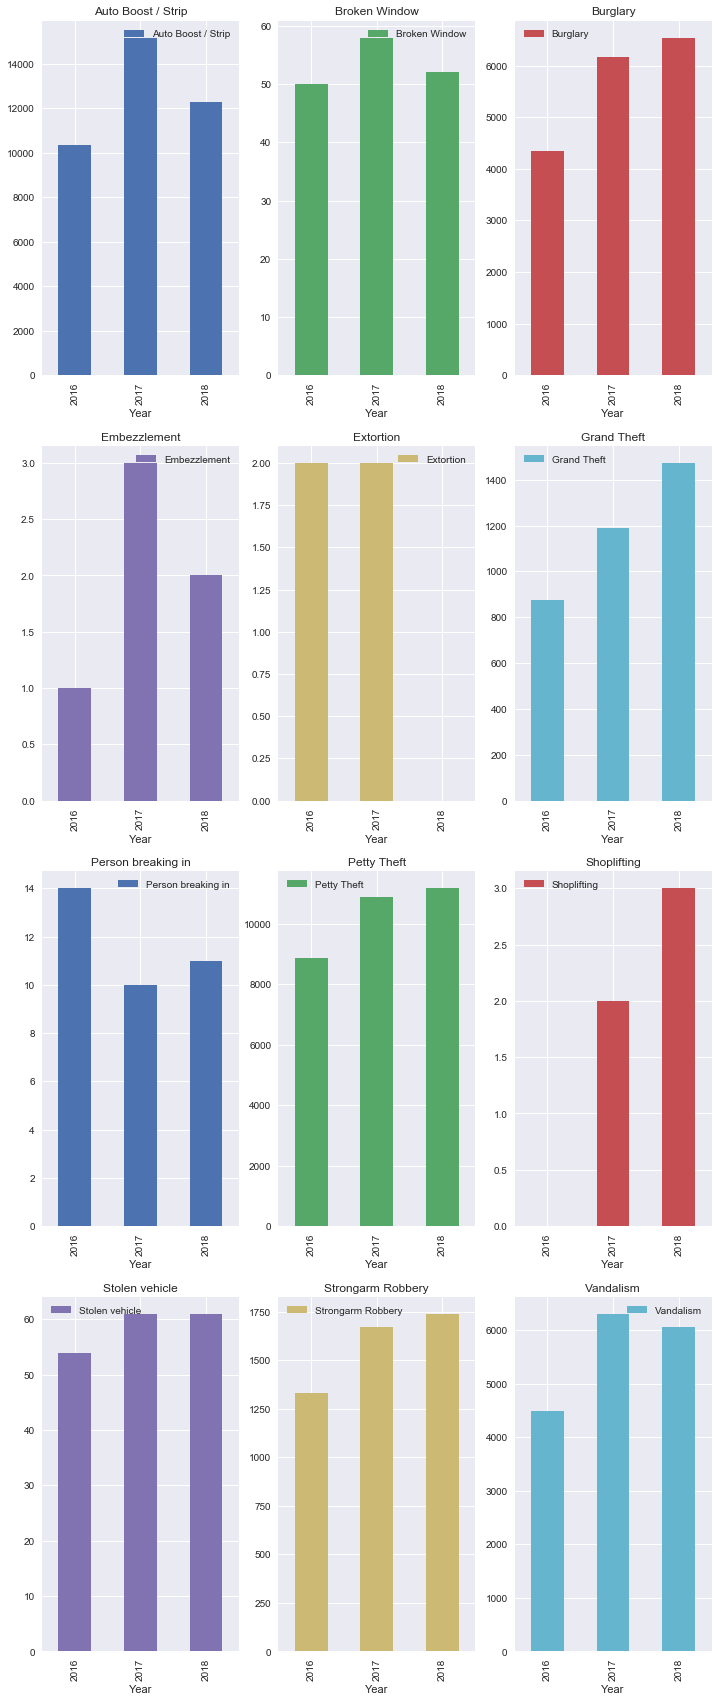

In [11]:
property_crimes_count_year.plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

### Plot 911 Calls for violent crimes by month and hour of the day

Text(0.5,1,'911 Calls for all violent crimes by month and hour of the day')

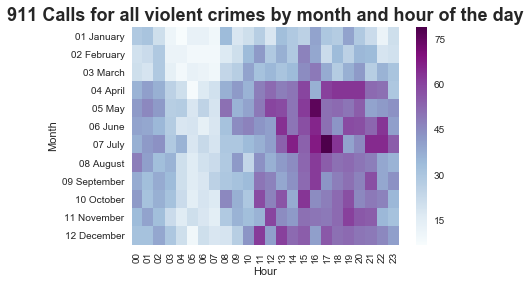

In [12]:
#figure(figsize=(10,8))
calls_for_violent_crimes['event']= 1
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
#p=pd.pivot_table(calls_for_violent_crimes,values='dummy_variable', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p=calls_for_violent_crimes.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax = sns.heatmap(p,cmap="BuPu",annot=False, annot_kws={"size": 7})
ax.set_title('911 Calls for all violent crimes by month and hour of the day',fontsize=18, fontweight="bold")

Text(0.5,1,'911 Calls for property crimes by month and hour of the day')

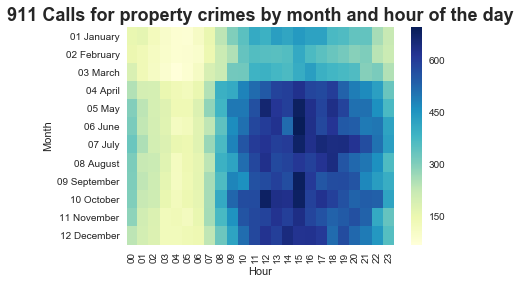

In [13]:
#figure(figsize=(10,8))
calls_for_property_crimes['event']= 1
calls_for_property_crimes['Month'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_property_crimes['Hour'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
#p=pd.pivot_table(calls_for_violent_crimes,values='dummy_variable', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p=calls_for_property_crimes.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax = sns.heatmap(p,cmap="YlGnBu",annot=False, annot_kws={"size": 7})
ax.set_title('911 Calls for property crimes by month and hour of the day',fontsize=18, fontweight="bold")

From above heatmap, it is interesting to see note that in aggregate, there is a spike in no. of calls for violent and property crimes during summer.

This proves the old theory that,increased temperatures in summer drive many out of doors and to leave windows open in their homes.Also, increased daylight hours can lengthen the amount of time people spend away from their homes raise the amount of people in public and the amount of time that homes are left empty. Others point to the effect of students on summer vacation, who are otherwise occupied with schooling during other seasons. It is also true that those suffering from heat-induced discomfort become more aggressive and likely to act out.

It is also intersting to note that the calls are mostly made from 9:00 am to 2:00 am.One can observe some clear drops in numbers around 3:00 am to 8:00 am in the morning. From the spike in calls right after the drop, it seems like the most frequent crime like robbery might have happened when people are asleep and businesses are closed.

Aggravated Assault is mostly reported from noon till midnight.Looking at this data one should understand that,by day, San Francisco is as safe as any big city neighborhood. But at night, it's wise for everyone to stick to streets with lots of foot traffic, or travel with an equally alert, sensible companion.

It can be observed that rape or sexual assault has no specific time of reporting.

We only have 7 incidents of homicides* and most of them are reported during day time.

(*This does not mean that SF had only 7 homisides in part 2 and a half years. There were oly 7 calls made for homicide.)

### Violent Crimes per address type

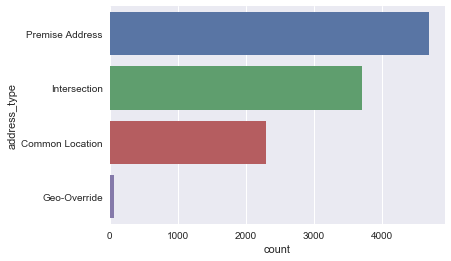

In [17]:
#plt.figure(figsize = (10, 8))
sns.countplot(y= 'address_type', data = calls_for_violent_crimes, order = calls_for_violent_crimes['address_type'].value_counts().iloc[:10].index)

### Property Crimes per address type

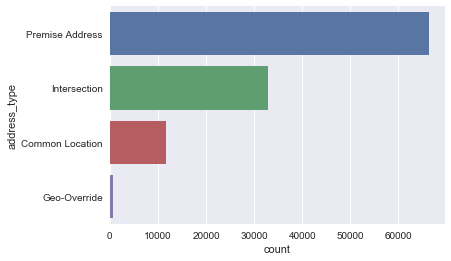

In [18]:
#plt.figure(figsize = (10, 8))
sns.countplot(y= 'address_type', data = calls_for_property_crimes, order = calls_for_property_crimes['address_type'].value_counts().iloc[:10].index)

### What is the most common location for a certain type of crime to happen?

In [19]:
location_by_propCrime  = calls_for_property_crimes.pivot_table(values=['crime_id'], index=['address_type'], columns='original_crimetype_name', aggfunc=np.size).fillna(0)
location_by_propCrime

crime_id                         \
original_crimetype_name Auto Boost / Strip Broken Window Burglary   
address_type                                                        
Common Location                     4376.0           7.0    648.0   
Geo-Override                         285.0           1.0     38.0   
Intersection                       18242.0          19.0    675.0   
Premise Address                    14904.0         133.0  15693.0   

                                                                               \
original_crimetype_name Embezzlement Extortion Grand Theft Person breaking in   
address_type                                                                    
Common Location                  2.0       2.0       417.0                1.0   
Geo-Override                     0.0       0.0        16.0                0.0   
Intersection                     0.0       0.0       730.0                0.0   
Premise Address                  4.0       2.0      2376.0               34.0   

                                                                \
original_crimetype_name Petty Theft Shoplifting Stolen vehicle   
address_type                                                     
Common Location              4563.0         0.0            9.0   
Geo-Override                   84.0         0.0            0.0   
Intersection                 5326.0         0.0           12.0   
Premise Address             20974.0         5.0          155.0   

                                                     
original_crimetype_name Strongarm Robbery Vandalism  
address_type                                         
Common Location                     529.0    1048.0  
Geo-Override                         38.0     134.0  
Intersection                       2075.0    5760.0  
Premise Address                    2095.0    9932.0

Text(0.5,1,'Most likely location for each property crime to happen')

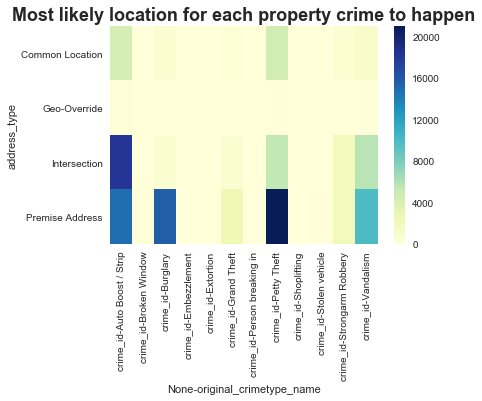

In [20]:
#p=calls_for_violent_crimes.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax1 = sns.heatmap(location_by_propCrime,cmap="YlGnBu",annot=False, annot_kws={"size": 7})
ax1.set_title('Most likely location for each property crime to happen',fontsize=18, fontweight="bold")

Text(0.5,1,'Most likely location for each violent crime to happen')

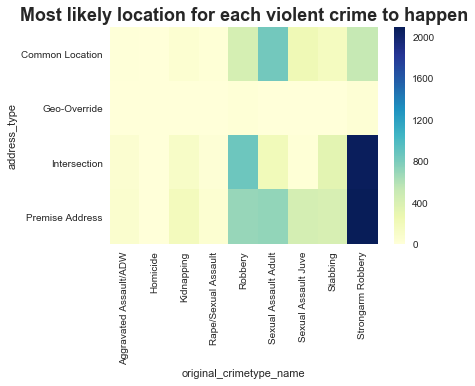

In [21]:
location_by_violentCrime  = calls_for_violent_crimes.pivot_table(values='crime_id', index='address_type', columns='original_crimetype_name', aggfunc=np.size).fillna(0)
location_by_violentCrime
ax2 = sns.heatmap(location_by_violentCrime,cmap="YlGnBu")
ax2.set_title('Most likely location for each violent crime to happen',fontsize=18, fontweight="bold")

### At what time of a day more calls are received? 

Text(0.5,1,'911 Calls for property crimes by day of the week and hour of the day')

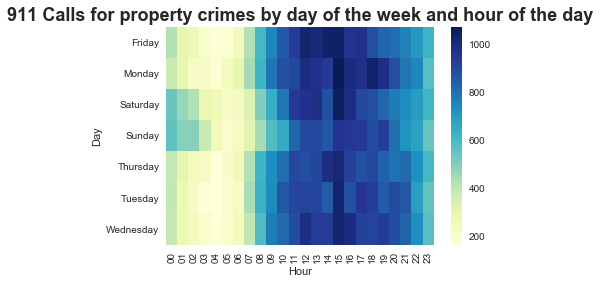

In [24]:

#figure(figsize=(10,8))
calls_for_property_crimes['event']= 1
#calls_for_property_crimes['Month'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_property_crimes['Hour'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
calls_for_property_crimes['Day'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%A'))
#p=pd.pivot_table(calls_for_violent_crimes,values='dummy_variable', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p1=calls_for_property_crimes.pivot_table(index=['Day'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax = sns.heatmap(p1,cmap="YlGnBu",annot=False, annot_kws={"size": 7})
ax.set_title('911 Calls for property crimes by day of the week and hour of the day',fontsize=18, fontweight="bold")

Text(0.5,1,'911 Calls for Violent crimes by day of the week and hour of the day')

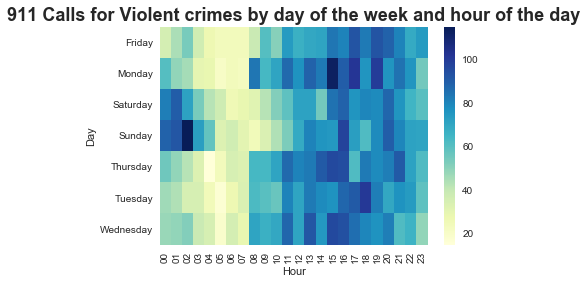

In [25]:

#figure(figsize=(10,8))
calls_for_violent_crimes['event']= 1
#calls_for_property_crimes['Month'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
calls_for_violent_crimes['Day'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%A'))
#p=pd.pivot_table(calls_for_violent_crimes,values='dummy_variable', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p2=calls_for_violent_crimes.pivot_table(index=['Day'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax = sns.heatmap(p2,cmap="YlGnBu",annot=False, annot_kws={"size": 7})
ax.set_title('911 Calls for Violent crimes by day of the week and hour of the day',fontsize=18, fontweight="bold")

In [26]:
%store calls_for_property_crimes
%store calls_for_violent_crimes

Stored 'calls_for_property_crimes' (DataFrame)
Stored 'calls_for_violent_crimes' (DataFrame)
